Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

*Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM

**Предложите свои варианты решения проблемы исчезающего градиента в RNN

**все прошлые задания тоже загружены**

In [18]:
import numpy as np
np.random.seed(42)
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.models import Sequential


# построчное чтение из примера с текстом 
with open("darvin", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)


# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1


# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 128, 128
NUM_ITERATIONS = 25
NUM_EPOCHS_PER_ITERATION = 5
NUM_PREDS_PER_EPOCH = 100


# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. За ним последует полносвязный слой связанный с набором возможных следующих символов, которые конвертированы в вероятностные результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    GRU(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")


# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
print()


Итерация #: 0
Epoch 1/5
7258/7258 [==============================] - 37s 5ms/step - loss: 1.7326
Epoch 2/5
7258/7258 [==============================] - 36s 5ms/step - loss: 1.2968
Epoch 3/5
7258/7258 [==============================] - 36s 5ms/step - loss: 1.1902
Epoch 4/5
7258/7258 [==============================] - 36s 5ms/step - loss: 1.1382
Epoch 5/5
7258/7258 [==============================] - 36s 5ms/step - loss: 1.1061
Генерация из посева: lands were
lands were completely discoloured by the same side of the leaf respect to the same side of the leaf respect to==================================================
Итерация #: 1
Epoch 1/5
7258/7258 [==============================] - 36s 5ms/step - loss: 1.0839
Epoch 2/5
7258/7258 [==============================] - 36s 5ms/step - loss: 1.0668
Epoch 3/5
7258/7258 [==============================] - 36s 5ms/step - loss: 1.0539
Epoch 4/5
7258/7258 [==============================] - 37s 5ms/step - loss: 1.0434
Epoch 5/5
7258/7258 [===========

In [31]:
import numpy as np
np.random.seed(42)
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.models import Sequential


# построчное чтение из примера с текстом 
with open("darvin", 'rb') as _in:
    lines = []
    for line in _in:
        line = line.strip().lower().decode("ascii", "ignore")
        if len(line) == 0:
            continue
        lines.append(line)
text = " ".join(lines)
chars = set([c for c in text])
nb_chars = len(chars)


# создание индекса символов и reverse mapping чтобы передвигаться между значениями numerical
# ID and a specific character. The numerical ID will correspond to a column
# ID и определенный символ. Numerical ID будет соответсвовать колонке
# число при использовании one-hot кодировки для представление входов символов
char2index = {c: i for i, c in enumerate(chars)}
index2char = {i: c for i, c in enumerate(chars)}

# для удобства выберете фиксированную длину последовательность 10 символов 
SEQLEN, STEP = 10, 1
input_chars, label_chars = [], []

# конвертация data в серии разных SEQLEN-length субпоследовательностей
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i: i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


# Вычисление one-hot encoding входных последовательностей X и следующего символа (the label) y

X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1


# установка ряда метапамертров  для нейронной сети и процесса тренировки
BATCH_SIZE, HIDDEN_SIZE = 256, 256
NUM_ITERATIONS = 10
NUM_EPOCHS_PER_ITERATION = 5
NUM_PREDS_PER_EPOCH = 100


# Create a super simple recurrent neural network. There is one recurrent
# layer that produces an embedding of size HIDDEN_SIZE from the one-hot
# encoded input layer. This is followed by a Dense fully-connected layer
# across the set of possible next characters, which is converted to a
# probability score via a standard softmax activation with a multi-class
# cross-entropy loss function linking the prediction to the one-hot
# encoding character label.

'''
Создание очень простой рекуррентной нейронной сети. В ней будет один реккурентный закодированный входной слой. За ним последует полносвязный слой связанный с набором возможных следующих символов, которые конвертированы в вероятностные результаты через стандартную softmax активацию с multi-class cross-encoding loss функцию ссылающуются на предсказание one-hot encoding лейбл символа
'''

model = Sequential()
model.add(
    LSTM(  # вы можете изменить эту часть на LSTM или SimpleRNN, чтобы попробовать альтернативы
        HIDDEN_SIZE,
        return_sequences=False,
        input_shape=(SEQLEN, nb_chars),
        unroll=True,
        dropout=0.2,
        recurrent_dropout=0.2
    )
)
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="nadam")


# выполнение серий тренировочных и демонстрационных итераций 
for iteration in range(NUM_ITERATIONS):

    # для каждой итерации запуск передачи данных в модель 
    print("=" * 50)
    print("Итерация #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)

    # Select a random example input sequence.
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]

    # для числа шагов предсказаний использование текущей тренируемой модели 
    # конструирование one-hot encoding для тестирования input и добавление предсказания.
    print("Генерация из посева: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):

        # здесь one-hot encoding.
        X_test = np.zeros((1, SEQLEN, nb_chars))
        for j, ch in enumerate(test_chars):
            X_test[0, j, char2index[ch]] = 1

        # осуществление предсказания с помощью текущей модели.
        pred = model.predict(X_test, verbose=0)[0]
        y_pred = index2char[np.argmax(pred)]

        # вывод предсказания добавленного к тестовому примеру 
        print(y_pred, end="")

        # инкрементация тестового примера содержащего предсказание
        test_chars = test_chars[1:] + y_pred
print()


Итерация #: 0
Epoch 1/5
3629/3629 [==============================] - 33s 9ms/step - loss: 2.0513
Epoch 2/5
3629/3629 [==============================] - 33s 9ms/step - loss: 1.5443
Epoch 3/5
3629/3629 [==============================] - 33s 9ms/step - loss: 1.3840
Epoch 4/5
3629/3629 [==============================] - 33s 9ms/step - loss: 1.3065
Epoch 5/5
3629/3629 [==============================] - 33s 9ms/step - loss: 1.2602
Генерация из посева: rance of h
rance of heat all the same sensitive of the leaves were placed on the leaves were placed on the leaves were pl==================================================
Итерация #: 1
Epoch 1/5
3629/3629 [==============================] - 33s 9ms/step - loss: 1.2284
Epoch 2/5
3629/3629 [==============================] - 33s 9ms/step - loss: 1.2048
Epoch 3/5
3629/3629 [==============================] - 33s 9ms/step - loss: 1.1868
Epoch 4/5
3629/3629 [==============================] - 34s 9ms/step - loss: 1.1724
Epoch 5/5
3629/3629 [===========

NUM_ITERATIONS  и NUM_ITERATIONS а также model BATCH_SIZE, HIDDEN_SIZE
результаты скорее веселые, чем понятные,
эпохи не помогают, текст то с долей смысла, то вновь впадает в цикл, осмысленные сочитания больше похожи на случайность


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Создаем объект для токенизапции
tokenizer = Tokenizer(num_words=1000)

data = open('darvin').read()
#Читаем текст
corpus = data.lower().split("\n")

In [4]:
corpus[:20]

['insectivorous plants',
 '',
 'charles darwin',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '                           contents.',
 '',
 '',
 '                          chapter i.',
 '',
 '          drosera rotundifolia, or the common sun-dew.',
 '',
 'number of insects captured--description of the leaves and their']

In [5]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
tokenizer.index_word[500]


'pure'

In [7]:
input_sequences[:2,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 312,  39],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  51, 633]], dtype=int32)

In [8]:
label[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(50, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 19, 10)            61350     
_________________________________________________________________
bidirectional (Bidirectional (None, 19, 100)           24400     
_________________________________________________________________
dropout (Dropout)            (None, 19, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                4440      
_________________________________________________________________
dense (Dense)                (None, 3067)              33737     
_________________________________________________________________
dense_1 (Dense)              (None, 6135)              18822180  
Total params: 18,946,107
Trainable params: 18,946,107
Non-trainable params: 0
____________________________________________

In [11]:
 history = model.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback],verbose=1)

Epoch 1/100
3239/3239 [==============================] - 62s 19ms/step - loss: 5.3014 - accuracy: 0.1073 - val_loss: 5.4636 - val_accuracy: 0.1219
Epoch 2/100
3239/3239 [==============================] - 61s 19ms/step - loss: 4.8771 - accuracy: 0.1421 - val_loss: 5.3044 - val_accuracy: 0.1383
Epoch 3/100
3239/3239 [==============================] - 61s 19ms/step - loss: 4.7276 - accuracy: 0.1577 - val_loss: 5.2726 - val_accuracy: 0.1418
Epoch 4/100
3239/3239 [==============================] - 62s 19ms/step - loss: 4.6422 - accuracy: 0.1656 - val_loss: 5.2670 - val_accuracy: 0.1461
Epoch 5/100
3239/3239 [==============================] - 61s 19ms/step - loss: 4.5522 - accuracy: 0.1829 - val_loss: 5.2167 - val_accuracy: 0.1539
Epoch 6/100
3239/3239 [==============================] - 61s 19ms/step - loss: 4.4736 - accuracy: 0.1942 - val_loss: 5.1741 - val_accuracy: 0.1631
Epoch 7/100
3239/3239 [==============================] - 61s 19ms/step - loss: 4.4139 - accuracy: 0.2046 - val_loss: 5

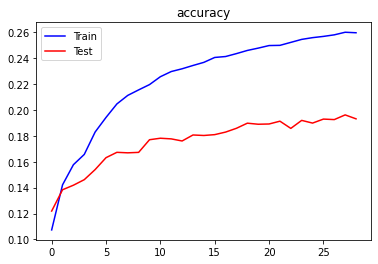

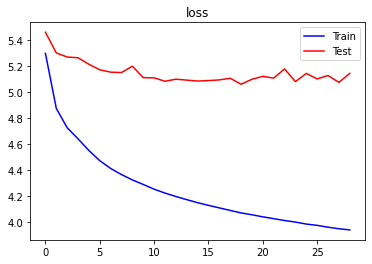

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
acc_v = history.history['val_accuracy']
loss = history.history['loss']
loss_v = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, acc_v, 'r', label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, loss_v, 'r', label='Test')
plt.title('loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Two roads diverged in a yellow wood,And sorry I could not travel both"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
  #y_p=model.predict(token_list)
	output_word = ""
	y_p=model.predict(token_list)
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Two roads diverged in a yellow wood,And sorry I could not travel both masses of the leaves and the glands of the leaves
